# Seattle vs. Boston Weather Project

## Load and explore the data

### Import libraries

In [109]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

### Load the data

##### Load the Seattle data set

In [110]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/mcsilver99/weather/main/data/seattle_rain.csv')

##### Load the Boston data set

In [111]:
df_boston = pd.read_csv('https://raw.githubusercontent.com/mcsilver99/weather/main/data/boston_rain.csv')

## Explore the contents of the data sets

#### Start by looking at the head of each data frame.

This will let us see the names of the columns and a few example values for each column.

In [112]:
# First 5 columns of the boston rain dataset
df_boston.head()

,STATION,NAME,DATE,PRCP,SNOW
0,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",1/1/18,0.00,0.0
1,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",1/2/18,0.00,0.0
2,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",1/3/18,0.00,0.0
3,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",1/4/18,1.35,13.4
4,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",1/5/18,0.00,0.0


In [113]:
# First 5 columns of the seattle rain dataset
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


#### Examine more rows of the Boston data set

##### Boston data set

In [114]:
# Show the first 10 columns of the Boston data
df_boston.head(10)

,STATION,NAME,DATE,PRCP,SNOW
0,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",1/1/18,0.00,0.0
1,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",1/2/18,0.00,0.0
2,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",1/3/18,0.00,0.0
3,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",1/4/18,1.35,13.4
4,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",1/5/18,0.00,0.0
5,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",1/6/18,0.00,0.0
6,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",1/7/18,0.00,0.0
7,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",1/8/18,0.00,0.0
8,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",1/9/18,0.00,0.0
9,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",1/10/18,0.00,0.0


Seattle and Boston both have extra columns that we will remove when we join the data sets.

Next, we will check if the Boston data set has any null values.

##### Boston data set

In [115]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1826 non-null   object 
 1   NAME     1826 non-null   object 
 2   DATE     1826 non-null   object 
 3   PRCP     1826 non-null   float64
 4   SNOW     1826 non-null   float64
dtypes: float64(2), object(3)
memory usage: 71.5+ KB


Notice that there are no null values in this data set because there are 1826 total entries and 1826 non-null values for each column. 

##### We can also compare data frame sizes using the shape attribute

In [116]:
# shape of the Boston data frame
df_boston.shape

(1826, 5)

In [117]:
# shape of the seattle data frame

In [118]:
df_seattle.shape

(1658, 10)

As we have seen in class, Seattle has some missing values that we will impute. 

#### Examine the `STATION` column of the Boston data
We have already seen in class that Seattle has one unique station. Let's check if the Boston data comes from more than one station. 

In [119]:
df_boston['STATION'].nunique()

1

Notice the Boston data has 1 station. 

#### Examine the `DATE` column of the Boston Data

In [120]:
df_boston['DATE']

0         1/1/18
1         1/2/18
2         1/3/18
3         1/4/18
4         1/5/18
          ...   
1821    12/27/22
1822    12/28/22
1823    12/29/22
1824    12/30/22
1825    12/31/22
Name: DATE, Length: 1826, dtype: object

#### Examine the `DATE` column of the Seattle Data

In [121]:
df_seattle['DATE']

0         1/1/18
1         1/2/18
2         1/3/18
3         1/4/18
4         1/5/18
          ...   
1653    12/27/22
1654    12/28/22
1655    12/29/22
1656    12/30/22
1657    12/31/22
Name: DATE, Length: 1658, dtype: object

We will convert both the Seattle and Boston to the datetime format in the next section that covers data cleaning. 

## Clean the Data

#### Convert `DATE` to datetime

In [152]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

In [153]:
df_boston['DATE'] = pd.to_datetime(df_boston['DATE'])

#### Join the two data sets and keep the Date and Precipitation columns
Seattle has missing data for some dates but Boston does not so we will have the full range of dates from 2018 to 2022 with the outer join. 

In [124]:
df = df_boston[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='outer')

#### Create a tidy data set by using the melt function to unpivot the precipitation columns for each city. 

In [127]:
df = pd.melt(df, id_vars='DATE', var_name='city', value_name='precipitation')

#### Rename the city columns

In [128]:
df.loc[df['city'] == 'PRCP_x', 'city'] = 'BOS'

In [129]:
df.loc[df['city'] == 'PRCP_y', 'city'] = 'SEA'

#### Rename the columns to make them lowercase to follow best practices

In [131]:
df = df.rename(columns={'DATE': 'date'})

### Impute missing values for Seattle
We will replace missing values with the mean across years of values on that day.

#### Define a column that labels each day by the day of the year: 1, 2, ..., 365.

In [132]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

#### Compute the mean precipitation for each day in Seattle, averaged across years.

In [133]:
mean_day_precipitation = df.loc[df['city'] == 'SEA',['precipitation', 'day_of_year']].groupby('day_of_year').mean()

#### Get the index of each row where precipitation is missing.

In [134]:
indices = np.where(df['precipitation'].isna() == True)[0]

#### Replace each missing value with the mean on that day

In [135]:
for index in indices:
    df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index,'day_of_year']].values[0]

#### Verify that there are no null values in our data set. 

In [136]:
df.isna().sum()

date             0
city             0
precipitation    0
day_of_year      0
dtype: int64

##### **We now have a clean data frame and can start creating graphs that will help us to answer the question of whether it rains more in Seattle or Boston.**

## Analyze and Model the data using graphs

### Plot the daily mean
We will first start our analysis by examing the daily means for the two cities across the 5 year period.

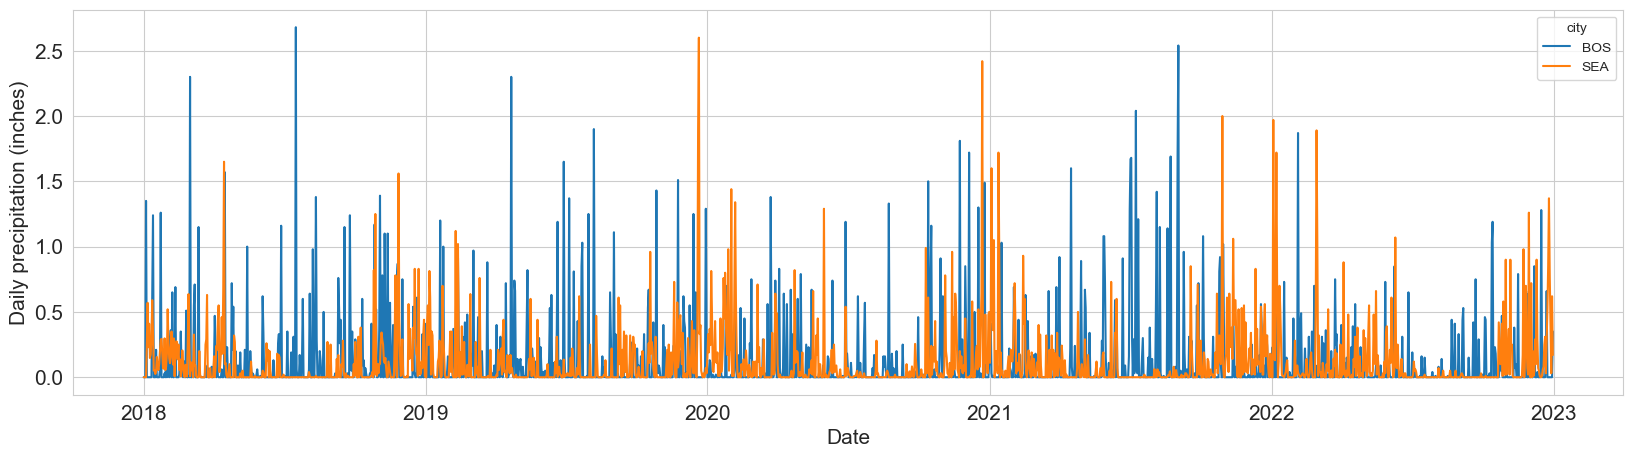

In [137]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df, x = 'date', y = 'precipitation', hue = 'city')

plt.xlabel('Date', fontsize=15) 
plt.ylabel('Daily precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

**Analysis:** From this graph alone it is hard to say whether it rains more in one of the cities. They look about equal with some spiking in some years than others but it seems like they even each out over the 5 years. 

#### Compute basic numerical summaries for precipitation in each city. 

In [138]:
df[['city', 'precipitation']].groupby('city').describe()

precipitation                                                
             count      mean       std  min  25%   50%   75%   max
city                                                              
BOS         1826.0  0.123122  0.301701  0.0  0.0  0.00  0.07  2.68
SEA         1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.60

**Analysis:** The cities look pretty similar in terms of their summary statistics. The mean and max rainfall are especially close.

#### Create a bar graph that shows mean daily precipitation

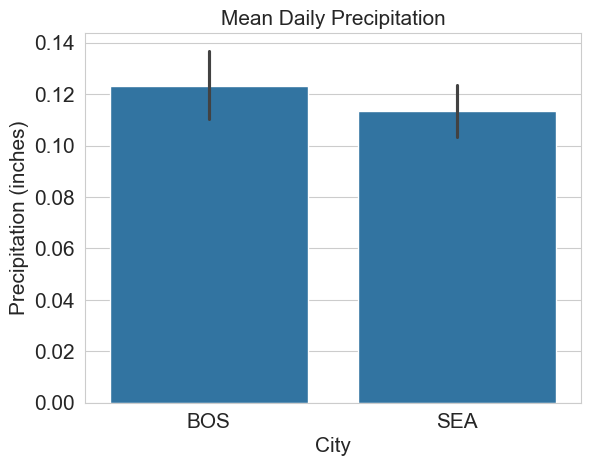

In [139]:
sns.barplot(data=df, x='city', y ='precipitation')

plt.ylabel('Precipitation (inches)', fontsize=15)
plt.xlabel('City', fontsize=15)
plt.title('Mean Daily Precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

**Analysis:** This graph depicts Boston with the higher average daily precipitation but does not take into account seasonal flucuations. Next, we will graph the mean daily precipitation by month to get a better picture of whether it rains more in one city depending on the time of year.

#### Add a column to the data frame with the number corresponding to the month

In [140]:
df['month'] = pd.DatetimeIndex(df['date']).month

#### Create a boxplot of the mean daily precipitation of the two cities by month

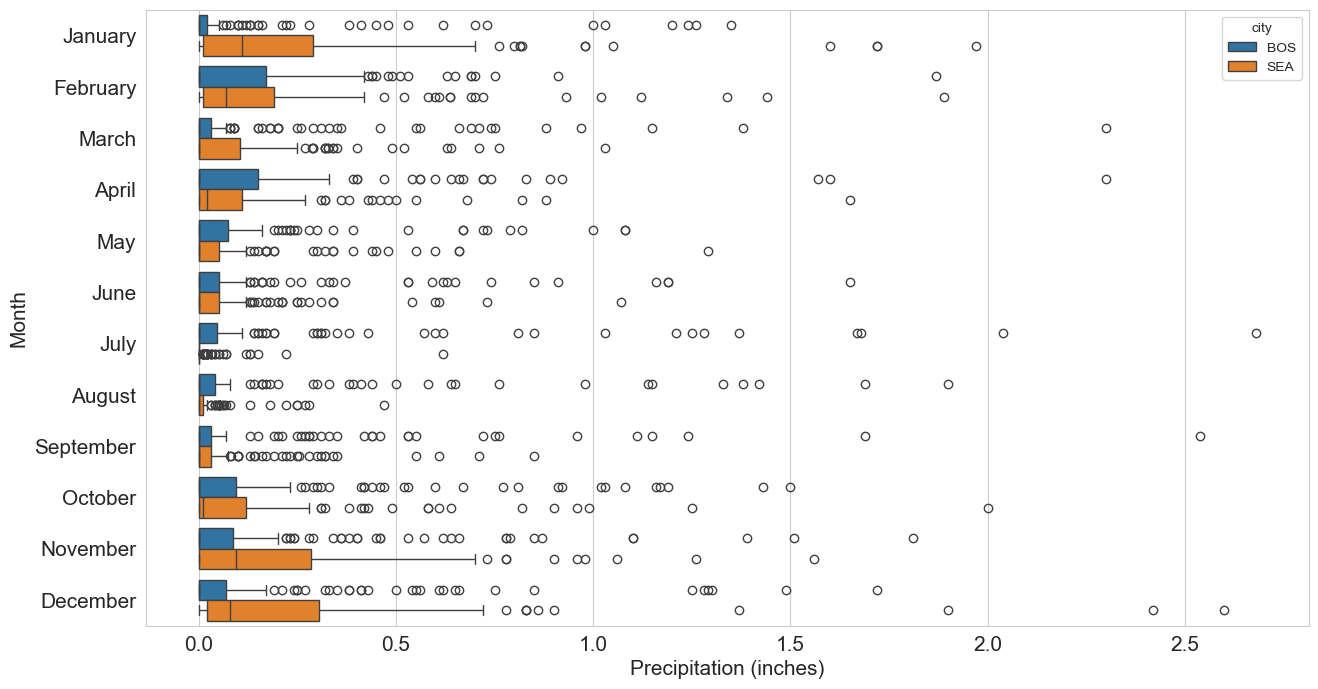

In [141]:
plt.figure(figsize=(15,8))

sns.boxplot(data=df, x='precipitation', y='month',  hue='city', orient='h') 

plt.ylabel('Month', fontsize=15)
plt.xlabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.yticks(ticks=range(12), labels=month_names)

plt.show()

**Analysis:** It look like Seattle has higher average daily rainfall in the Fall/Winter months while the opposite is true in the Sprint/Summer months. 

#### Plot the mean precipitation each month

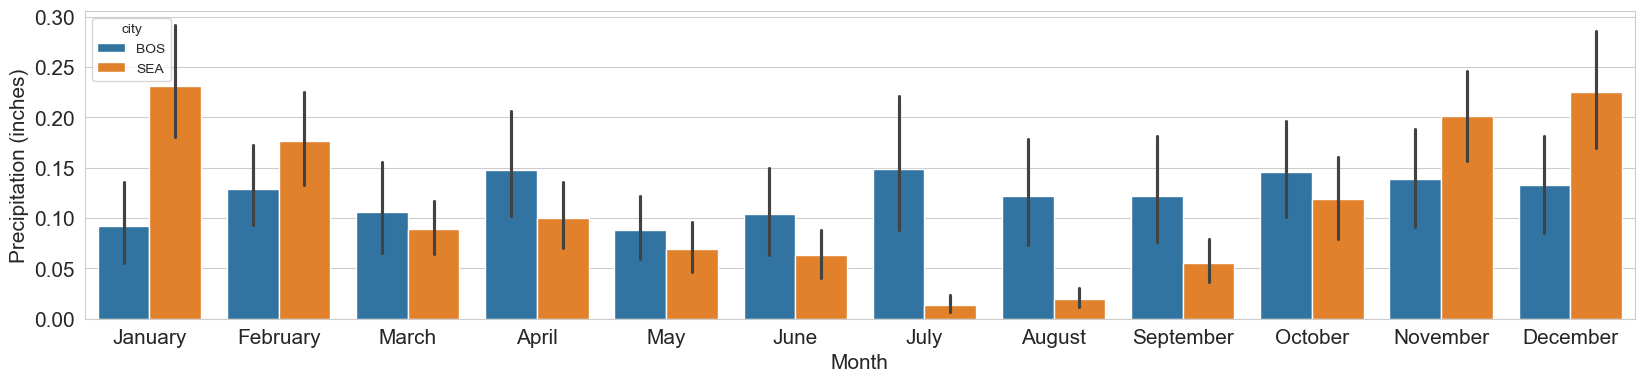

In [143]:
plt.figure(figsize=(20,4))

sns.barplot(data=df, x='month', y='precipitation', hue='city') 

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names) # Set x-axis to month names

plt.show()

**Analysis:** It looks like Seattle has seasonal flucuations with higher average daily rainfall in the Winter and Fall, whereas Boston is fairly consistent throughout the year. 

Next we will look at the proportion of days where there is any rain and do a month wise comparison.

### Plot the proportion of days with any precipitation

The following code adds a new column to the dataframe called 'any_precipitation'. It returns False if the precipitation is 0 and True if the value is greater than 0.

In [144]:
df['any_precipitation'] = df['precipitation'] > 0

In [145]:
df.head()

,date,city,precipitation,day_of_year,month,any_precipitation
0,2018-01-01,BOS,0.00,1,1,False
1,2018-01-02,BOS,0.00,2,1,False
2,2018-01-03,BOS,0.00,3,1,False
3,2018-01-04,BOS,1.35,4,1,True
4,2018-01-05,BOS,0.00,5,1,False


#### Plot the proportion of days with any precipitation over the 5 years

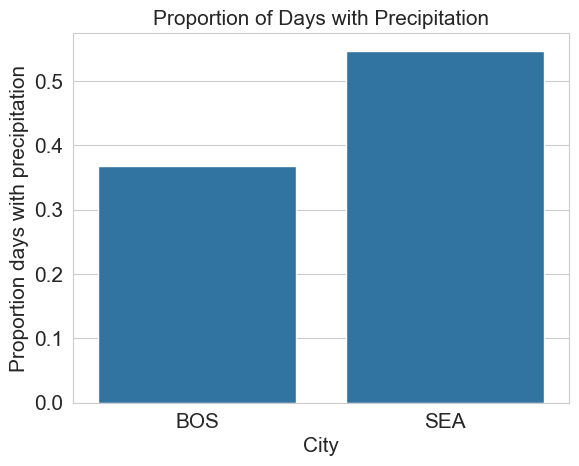

In [166]:
sns.barplot(data=df, x='city', y='any_precipitation', errorbar=None) 

plt.xlabel('City', fontsize=15)
plt.ylabel('Proportion days with precipitation', fontsize=15)

plt.tick_params(labelsize=15)
plt.title('Proportion of Days with Precipitation', fontsize=15)

plt.show()

**Analysis:** Here we can see that Seattle has a higher proportion of days it rains over the 5 years.

#### Plot the proportion of days with precipitation each month
Now we want to see which city has the higher proportion of precipitation by month. 

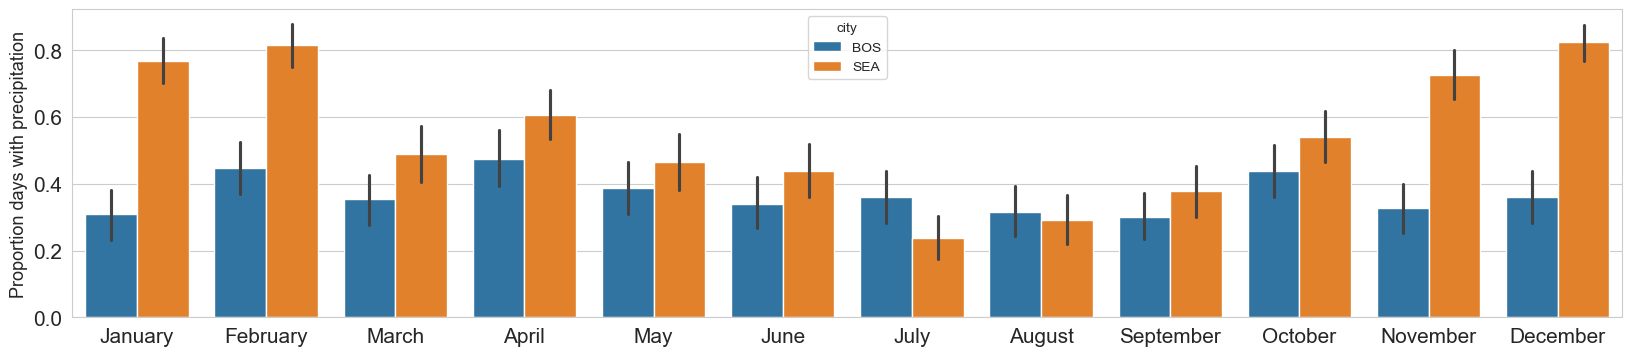

In [147]:
plt.figure(figsize=(20,4))

sns.barplot(data=df, x='month', y='any_precipitation', hue='city') 

plt.xlabel(None)
plt.ylabel('Proportion days with precipitation', fontsize=13)

plt.xticks(ticks=range(12), labels=month_names)
plt.tick_params(labelsize=15)

plt.show()

**Analysis:** We can see that for every month expect for July and August, Seattle has higher proportion of days where there is rainfall. In the previous graphs where we were comparing average amount of rain in inches, Boston was higher in the spring and summer even though Seattle has more days in which rain occurs.


Next, we will do statistical modeling to determine if there is statistically significant differences between the two cities.

## Modeling and graphing the results

### Conduct a two-sided t-test
Perform a statistical test for differences in the mean precipitation each month between Seattle and Boston.
We will conduct a test for each month to see if there are significant differences in the amount of rain and proprtion of days it rains between the two cities. 

For each month our null hypothesis will be that there is no significant difference between the cities. Our alternative hypothesis will be that there is a significant difference between the cities. 

#### Now we will perform two sided t-tests for each month comparing average rainfall in the two cities.

In [148]:
from scipy import stats

In [149]:
significance_level = 0.05
significantly_different = np.zeros(12)

# Perform t-test for each month
for month in range(1,13): 
    #Get precipitation data for Seattle and Boston for the current month
    sea_data = df.loc[(df['city'] == 'SEA') & (df['month'] == month), 'precipitation']
    bos_data = df.loc[(df['city'] == 'BOS') & (df['month'] == month), 'precipitation']

    t_statistic, p_value = stats.ttest_ind(sea_data, bos_data, equal_var=False)

    if p_value < significance_level: 
        significantly_different[month-1] = 1

    print(f"Month {month}:")
    print(f" t-statistic = {t_statistic:.2f}")
    print(f" p-value t test = {p_value:.3f}")
    print ("-" * 20)

Month 1:
 t-statistic = 4.05
 p-value t test = 0.000
--------------------
Month 2:
 t-statistic = 1.46
 p-value t test = 0.145
--------------------
Month 3:
 t-statistic = -0.63
 p-value t test = 0.527
--------------------
Month 4:
 t-statistic = -1.54
 p-value t test = 0.124
--------------------
Month 5:
 t-statistic = -0.90
 p-value t test = 0.369
--------------------
Month 6:
 t-statistic = -1.68
 p-value t test = 0.095
--------------------
Month 7:
 t-statistic = -4.12
 p-value t test = 0.000
--------------------
Month 8:
 t-statistic = -3.79
 p-value t test = 0.000
--------------------
Month 9:
 t-statistic = -2.28
 p-value t test = 0.024
--------------------
Month 10:
 t-statistic = -0.84
 p-value t test = 0.400
--------------------
Month 11:
 t-statistic = 1.85
 p-value t test = 0.065
--------------------
Month 12:
 t-statistic = 2.34
 p-value t test = 0.020
--------------------


**Analysis**: This output shows the t-stastic and p-value for each test we did per month. We can see that there are 5 months where the p-value is less than our significance level of 0.05 indicating for those 5 months, we have sufficient evidence to reject the null hypothesis that the mean rainfall between the two cities are not significantly different. We will see in the next graph a clearer representation of this result. 

#### Plot the mean precipitation each month with a star for significant differences

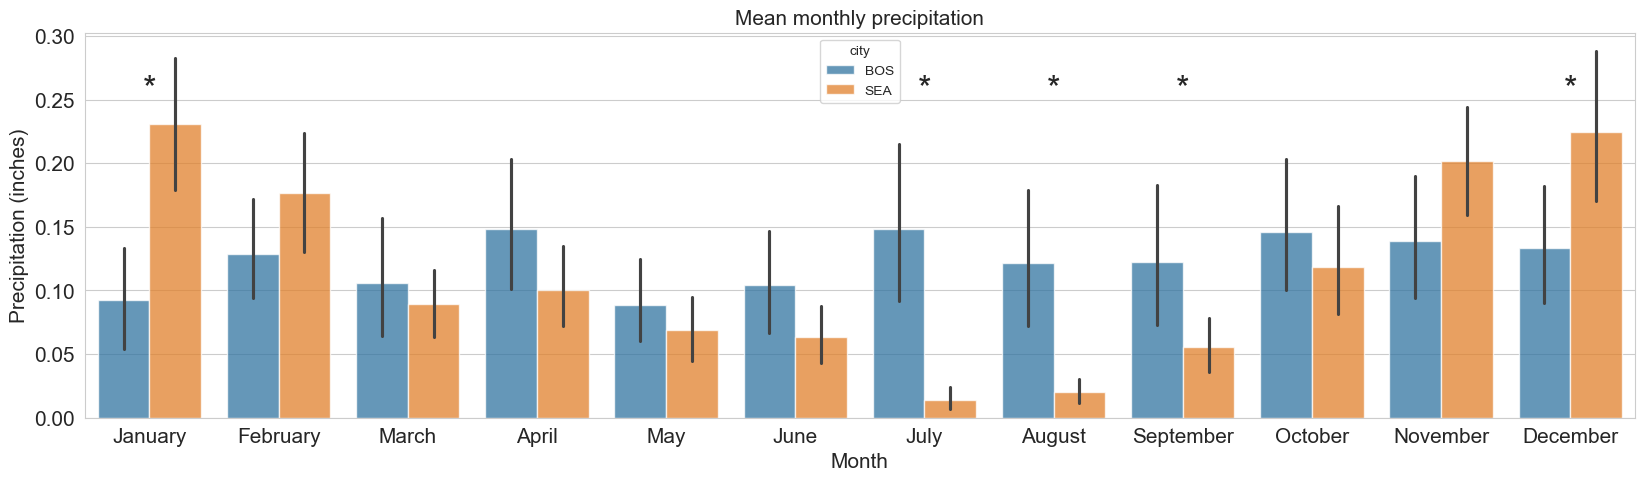

In [164]:
plt.figure(figsize=(20,5))

sns.barplot(data=df, x='month', y='precipitation', hue='city', alpha=0.75) 

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
plt.title('Mean monthly precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)

# Add stars for significantly different months
for month in range(12):
    if significantly_different[month] == 1:
        # Add a star
        plt.text(month, 0.25, '*', ha='center', fontsize=25)

plt.show()

**Analysis:** As you can see, for January, July, August, September, and December  we do have sufficient evidence to the reject the null hypothesis that the mean rainfall in Seattle is not greater than nor less than the mean rainfall in Boston. For the remaining months, we do not have enough evidence to reject the null hypothesis. 

### Conduct a two-sided z-test

#### Perform a statistical test for differences in the proportion of days with any precipitation each month between the cities.

In [162]:
from statsmodels.stats.proportion import proportions_ztest

significance_level = 0.05
significantly_different_proportion = np.zeros(12)

# Perform t-test for each month
for month in range(1,13):
    # Create a contingency table for Seattle and St.Louis for the current month: 
    contingency_table = pd.crosstab(df.loc[df['month'] == month, 'city'], df.loc[df['month'] == month, 'any_precipitation'])

    # Calculate the number of True values (days with precipitation) for each city
    days_with_precipitation = contingency_table[True]
    
    # Calculate the total number of days for each city 
    total_counts = contingency_table.sum(axis=1)

    # Hypothesis test
    zstat, p_value = proportions_ztest(count=days_with_precipitation, nobs=total_counts, alternative='two-sided')

    if p_value < significance_level: 
        significantly_different_proportion[month-1] = 1
        
    print(f"Month {month}:")
    print(f" z-statistic = {zstat:.2f}")
    print(f" p-value = {p_value:.3f}")
    print ("-" * 20)

Month 1:
 z-statistic = -8.09
 p-value = 0.000
--------------------
Month 2:
 z-statistic = -6.42
 p-value = 0.000
--------------------
Month 3:
 z-statistic = -2.41
 p-value = 0.016
--------------------
Month 4:
 z-statistic = -2.32
 p-value = 0.021
--------------------
Month 5:
 z-statistic = -1.38
 p-value = 0.168
--------------------
Month 6:
 z-statistic = -1.78
 p-value = 0.076
--------------------
Month 7:
 z-statistic = 2.35
 p-value = 0.019
--------------------
Month 8:
 z-statistic = 0.49
 p-value = 0.621
--------------------
Month 9:
 z-statistic = -1.46
 p-value = 0.144
--------------------
Month 10:
 z-statistic = -1.82
 p-value = 0.069
--------------------
Month 11:
 z-statistic = -6.94
 p-value = 0.000
--------------------
Month 12:
 z-statistic = -8.33
 p-value = 0.000
--------------------


**Analysis:** This output shows the z-stastic and p-value for each test we did per month. We can see that there are 7 months where the p-value is less than our significance level of 0.05 indicating for those 7 months we have sufficient evidence to reject the null hypothesis that the proportion of days with rainfall between the two cities are not significantly different.

#### Plot the proportion of days with any precipitation each month with a star for significant differences

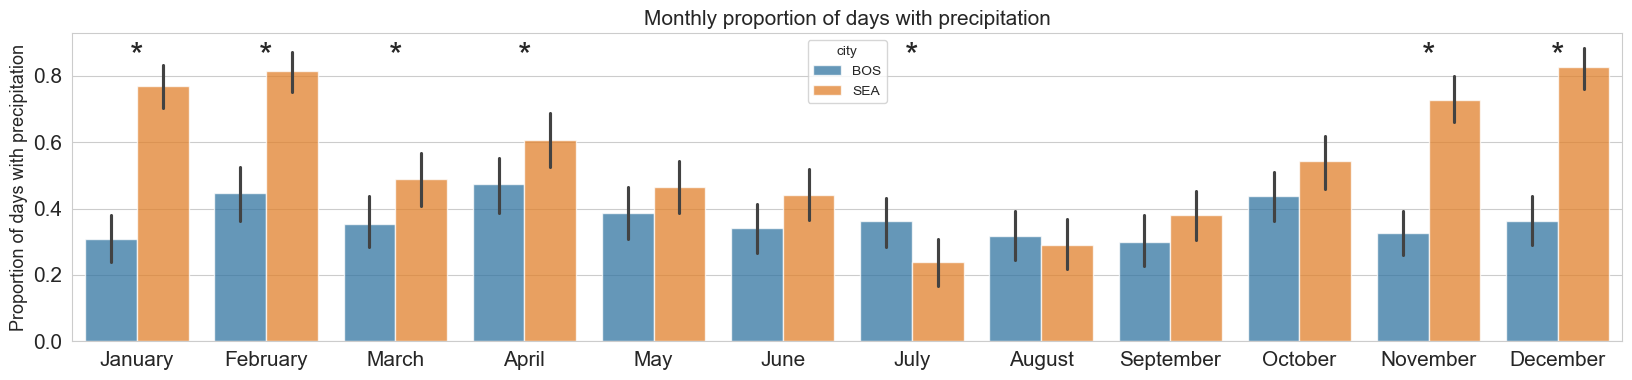

In [163]:
plt.figure(figsize=(20,4))

sns.barplot(data=df, x='month', y='any_precipitation', hue='city', alpha=0.75) 

plt.xlabel(None)
plt.ylabel('Proportion of days with precipitation', fontsize=13)
plt.title('Monthly proportion of days with precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)

# Add stars for significantly different months
for month in range(12):
    if significantly_different_proportion[month] == 1:
        # Add a star
        plt.text(month, 0.825, '*', ha='center', fontsize=25)

plt.show()

**Analysis:** Here can see the results of the z-test more clearly. In the months January, February, March, April, July, November, and December we do have sufficient evidence to the reject the null hypothesis that the proportion of days it rains in Seattle is not greater than nor less than the proportion of days it rains in Boston. For the remaining months, we do not have enough evidence to reject the null hypothesis. 